# Sampling from a Biased Population

In this tutorial we will go over some code that recreates the visualizations in the Interactive Sampling Distribution Demo. This demo looks at a hypothetical problem that illustrates what happens when we sample from a biased population and not the entire population we are interested in. This tutorial assumes that you have seen that demo, for context, and understand the statistics behind the graphs.

In [1]:
import numpy as np  # for sampling for the distributions
from matplotlib import pyplot as plt  # for basic plotting
import seaborn as sns  # for plotting of the histograms

sns.set_style('darkgrid')

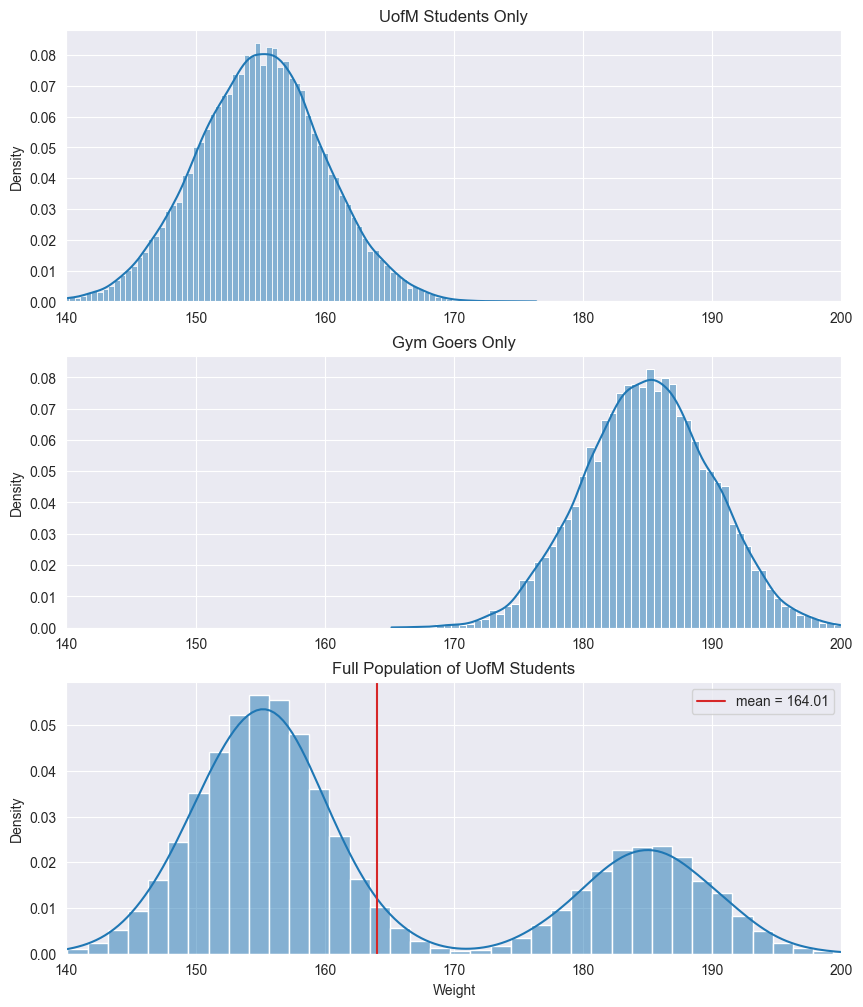

In [2]:
# Recreate the simulations from the video 
mean_uofm = 155  # mean weight non-gym goers
sd_uofm = 5
mean_gym = 185  # mean weight gym goers
sd_gym = 5
gymperc = .3  # gym percentage
totalPopSize = 40000  # total students

# Create the two subgroups - gym goers and non-gym goers
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * gymperc))

# Create the population from the subgroups
population = np.append(uofm_students, students_at_gym)

# Set up the figure for plotting
plt.figure(figsize=(10, 12))

# Plot the UofM students only
plt.subplot(3, 1, 1)
sns.histplot(data=uofm_students, stat='density', kde=True)  # sns.displot()
plt.xlim([140, 200])
plt.title("UofM Students Only")

# Plot the Gym Goers only
plt.subplot(3, 1, 2)
sns.histplot(data=students_at_gym, stat='density', kde=True)
plt.xlim([140, 200])
plt.title("Gym Goers Only")

# Plot both groups together
plt.subplot(3, 1, 3)
sns.histplot(data=population, stat='density', kde=True)
plt.axvline(x=np.mean(population), color='tab:red',
            label=f"mean = {np.mean(population):.2f}")
plt.xlim([140, 200])
plt.legend()
plt.title("Full Population of UofM Students")
plt.xlabel("Weight")

plt.show()

## What Happens if We Sample from the Entire Population?

We will sample randomly from all students at the University of Michigan.

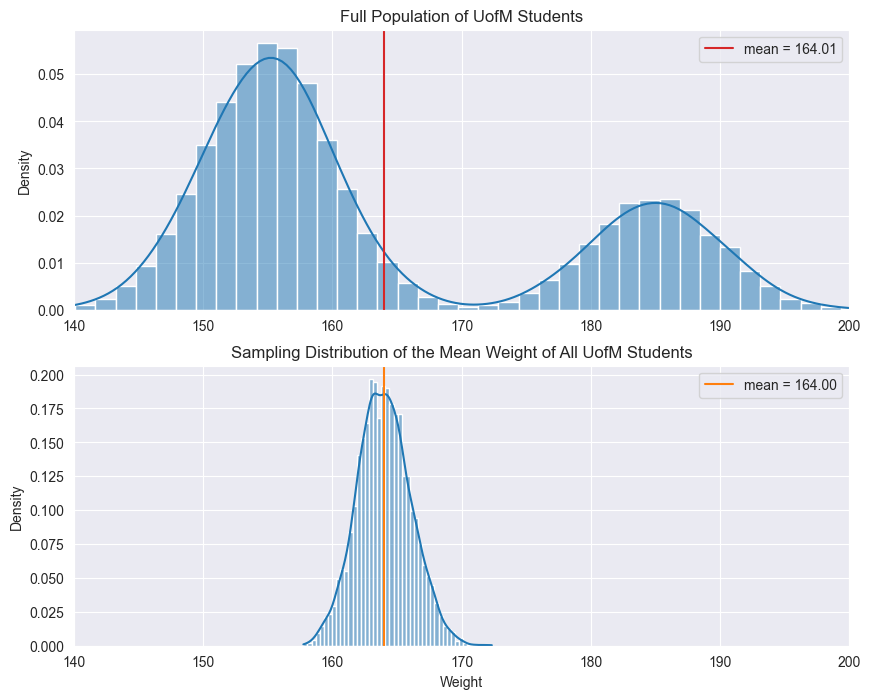

In [3]:
# Simulation parameters
numberSamps = 5000  # number of samples (means)
sampSize = 50  # sample size (students)

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(population, sampSize)
    mean_distribution[i] = np.mean(random_students)

# Plot the population and the biased sampling distribution
plt.figure(figsize=(10, 8))

# Plotting the population again
plt.subplot(2, 1, 1)
sns.histplot(data=population, stat='density', kde=True)
plt.axvline(x=np.mean(population), color='tab:red',
            label=f"mean = {np.mean(population):.2f}")
plt.xlim([140, 200])
plt.legend()
plt.title("Full Population of UofM Students")

# Plotting the sampling distribution
plt.subplot(2, 1, 2)
sns.histplot(data=mean_distribution, stat='density', kde=True)
plt.axvline(x=np.mean(mean_distribution), color='tab:orange',
            label=f"mean = {np.mean(mean_distribution):.2f}")
plt.xlim([140, 200])
plt.legend()
plt.title("Sampling Distribution of the Mean Weight of All UofM Students")
plt.xlabel("Weight")

plt.show()

## What Happens if We take a Non-Representative Sample?

What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?

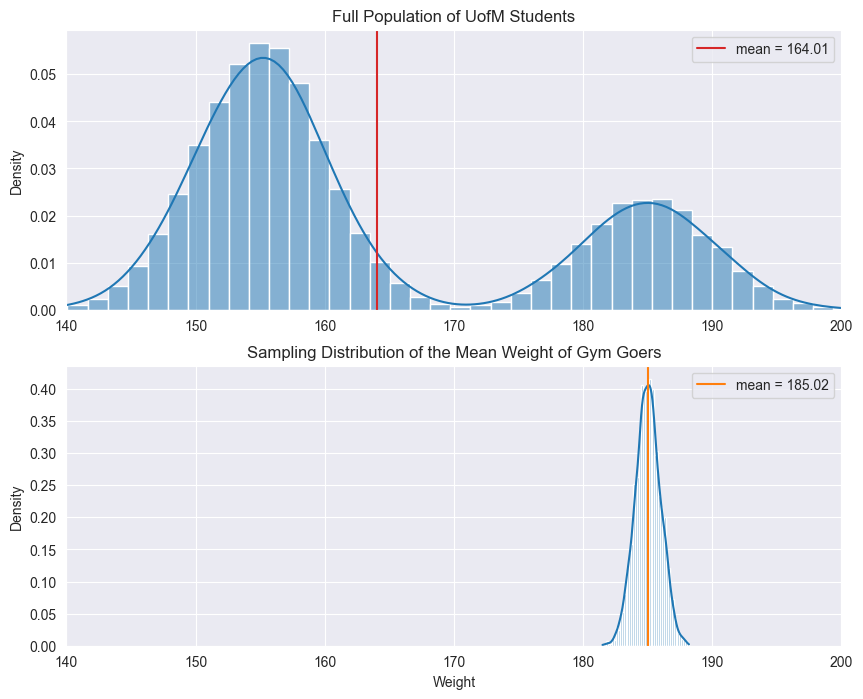

In [4]:
# Simulation parameters
numberSamps = 5000
sampSize = 25

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution[i] = np.mean(random_students)

# Plot the population and the biased sampling distribution
plt.figure(figsize=(10, 8))

# Plotting the population again
plt.subplot(2, 1, 1)
sns.histplot(data=population, stat='density', kde=True)
plt.axvline(x=np.mean(population), color='tab:red',
            label=f"mean = {np.mean(population):.2f}")
plt.xlim([140, 200])
plt.legend()
plt.title("Full Population of UofM Students")

# Plotting the sampling distribution
plt.subplot(2, 1, 2)
sns.histplot(data=mean_distribution, stat='density', kde=True)
plt.axvline(x=np.mean(students_at_gym), color='tab:orange',
            label=f"mean = {np.mean(students_at_gym):.2f}")
plt.xlim([140, 200])
plt.legend()
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.xlabel("Weight")

plt.show()